     |████████████████████████████████| 972kB 8.2MB/s 
     |████████████████████████████████| 14.8MB 293kB/s 
     |████████████████████████████████| 6.5MB 48.3MB/s 


In [ ]:
pip install geopy

In [ ]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

* print top 5 rows of world data-frame

In [ ]:
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


* remove continents which have only one country in data-frame


In [ ]:
# continents with only one country
world.groupby('continent').count()
y = world.loc[world['continent'] == 'Seven seas (open ocean)']

# remove these continents
world_cnt = world.loc[(world['continent'] != 'Seven seas (open ocean)') & (world['continent'] != 'Antarctica')]
world_cnt.groupby('continent').count()

,pop_est,name,iso_a3,gdp_md_est,geometry
continent,,,,,
Africa,51,51,51,51,51
Asia,47,47,47,47,47
Europe,39,39,39,39,39
North America,18,18,18,18,18
Oceania,7,7,7,7,7
South America,13,13,13,13,13


* create dataframe with top 3 most populated countries from each continent
* store the result in data-frame with name 'world_filtered'

In [ ]:
world_afr = world.loc[world['continent'] == 'Africa'].sort_values(by='pop_est', ascending = False).head(3)
world_asi = world.loc[world['continent'] == 'Asia'].sort_values(by='pop_est', ascending = False).head(3)
world_eur = world.loc[world['continent'] == 'Europe'].sort_values(by='pop_est', ascending = False).head(3)
world_na = world.loc[world['continent'] == 'North America'].sort_values(by='pop_est', ascending = False).head(3)
world_oc = world.loc[world['continent'] == 'Oceania'].sort_values(by='pop_est', ascending = False).head(3)
world_sa = world.loc[world['continent'] == 'South America'].sort_values(by='pop_est', ascending = False).head(3)


* print 'world_filtered' data-frame

In [ ]:
world_filtered = world_afr
world_filtered = world_filtered.append(world_asi)
world_filtered = world_filtered.append(world_eur)
world_filtered = world_filtered.append(world_na)
world_filtered = world_filtered.append(world_oc)
world_filtered = world_filtered.append(world_sa)
world_filtered

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
56,190632261,Africa,Nigeria,NGA,1089000.0,"POLYGON ((2.692 6.259, 2.749 7.871, 2.724 8.50..."
165,105350020,Africa,Ethiopia,ETH,174700.0,"POLYGON ((47.789 8.003, 44.964 5.002, 43.661 4..."
163,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.866 22.000, 32.900 22.000, 29.020..."
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.475 18.198, 108.655 18.508..."
98,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.327 28.262, 97.403 27.883, 97.052..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.000 -2.600, 141.017 -5.859..."
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."
121,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.120 53.757, 14.353 53.248, 14.075..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0..."


## Part I: 
Create choropleth map of world:
   - using **Geopandas**
   - using **Plotly**

> #### Notes
> * the colors of countries from 'world_filtered' are based on population
> * other countries can stay white

### GeoPandas

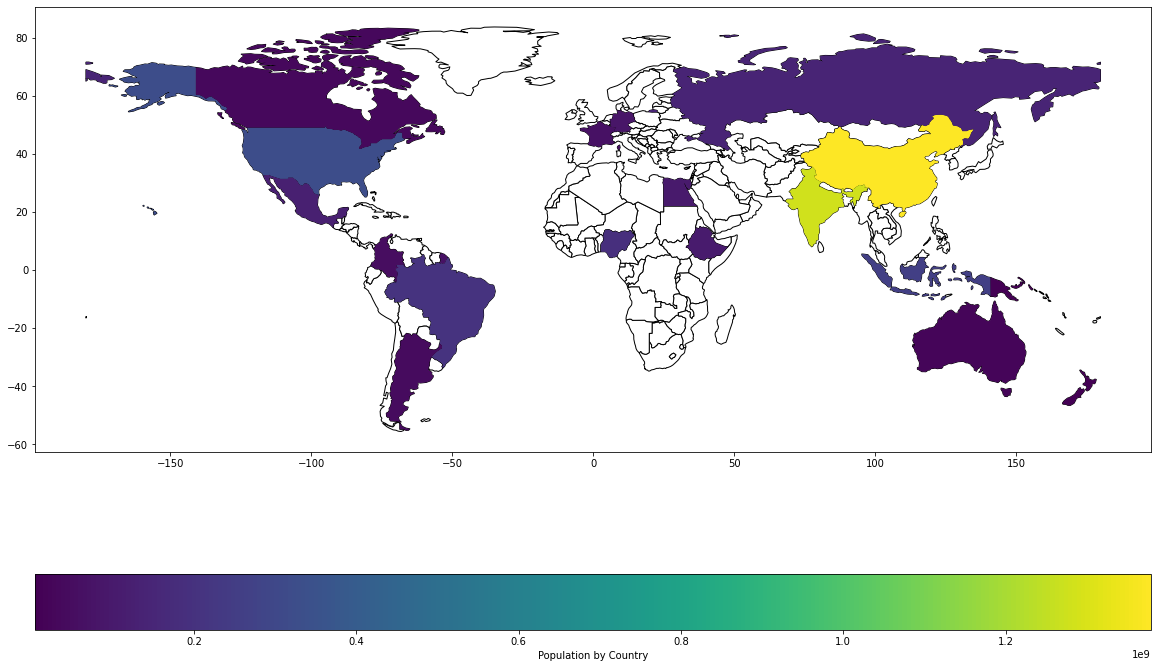

In [ ]:
# create figure and axes
fig, ax = plt.subplots(figsize=(20,15))
ax.set_aspect('equal')

# create map from world_filtered data-frame

world_filtered.plot(column='pop_est', ax=ax,legend = True, legend_kwds={'label': "Population by Country",
                       'orientation': "horizontal"})
world_cnt.plot(ax=ax, color ='white', edgecolor='black', zorder=0)
plt.show()

# add the rest of the countries

plt.show()


### Plotly

## Part II:

In Geopandas:

* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
* to get geometry of these cities use gpd.tools.geocode(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
* if you do not have geopy library instaled, install it with the following command in the jupyter notebook cell `!pip install geopy`

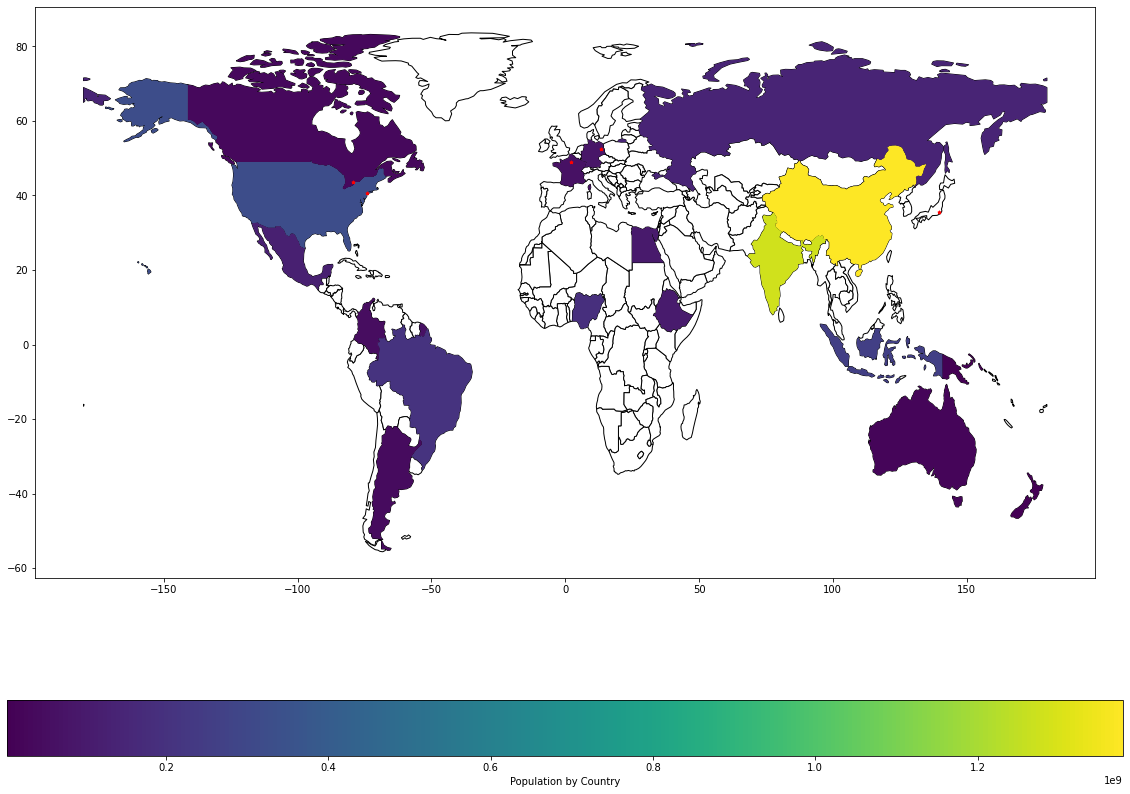

In [ ]:
# get geometry
cities = gpd.tools.geocode(['New York', 'Berlin', 'Paris', 'Toronto', 'Tokyo'])

# create figure and axes
fig, ax = plt.subplots(figsize=(20,15))
ax.set_aspect('equal')
world_filtered.plot(column='pop_est', ax=ax,legend = True, legend_kwds={'label': "Population by Country",
                       'orientation': "horizontal"})
world_cnt.plot(ax=ax, color ='white', edgecolor='black', zorder=0)
cities.plot(ax=ax, marker='*', color='red', markersize=10)
cities=cities.to_crs(world_cnt.crs)
plt.show()


# create map from world_filtered data-frame




# add the rest of the countries



# add cities
